# Titanic survived Project

Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


**Attribute Information**
  
- Passenger id- Unique Id of the passenger
- Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Survived- Survived (0 = No; 1 = Yes)
- Name- Name of the passenger
- Sex- Sex of the passenger (Male, Female)
- Age- Age of the passenger
- Sibsp- Number of Siblings/Spouses Aboard
- Parch- Number of Parents/Children Aboard
- Ticket- Ticket Number
-Fare- Passenger Fare (British pound)
- Cabin- Cabin
- Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


Dataset Link-

https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Titanic/titanic_train.csv


In [1]:
# Necessary Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
df.dropna(subset = ['Embarked'],inplace = True)

In [9]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [10]:
df.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
885,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
886,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
887,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'C83', 'F33', 'F G73',
       'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24',

In [12]:
df.drop(columns = ['Cabin'],axis = 1,inplace=True)

In [13]:
df.shape

(889, 11)

In [14]:
df.drop(columns = ['Name','Ticket'],axis = 1,inplace=True)

In [15]:
df.shape

(889, 9)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [17]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
df['Sex'] = df['Sex'].replace({'male':1,'female':0})

In [19]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [20]:
df.shape

(889, 9)

In [21]:
df['Age'] = df['Age'].replace(np.nan, df['Age'].mean())

In [22]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [23]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [24]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
df['Embarked'] = lab_enc.fit_transform(df['Embarked'])

In [25]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


Multivariate Analysis

<Figure size 3000x3000 with 0 Axes>

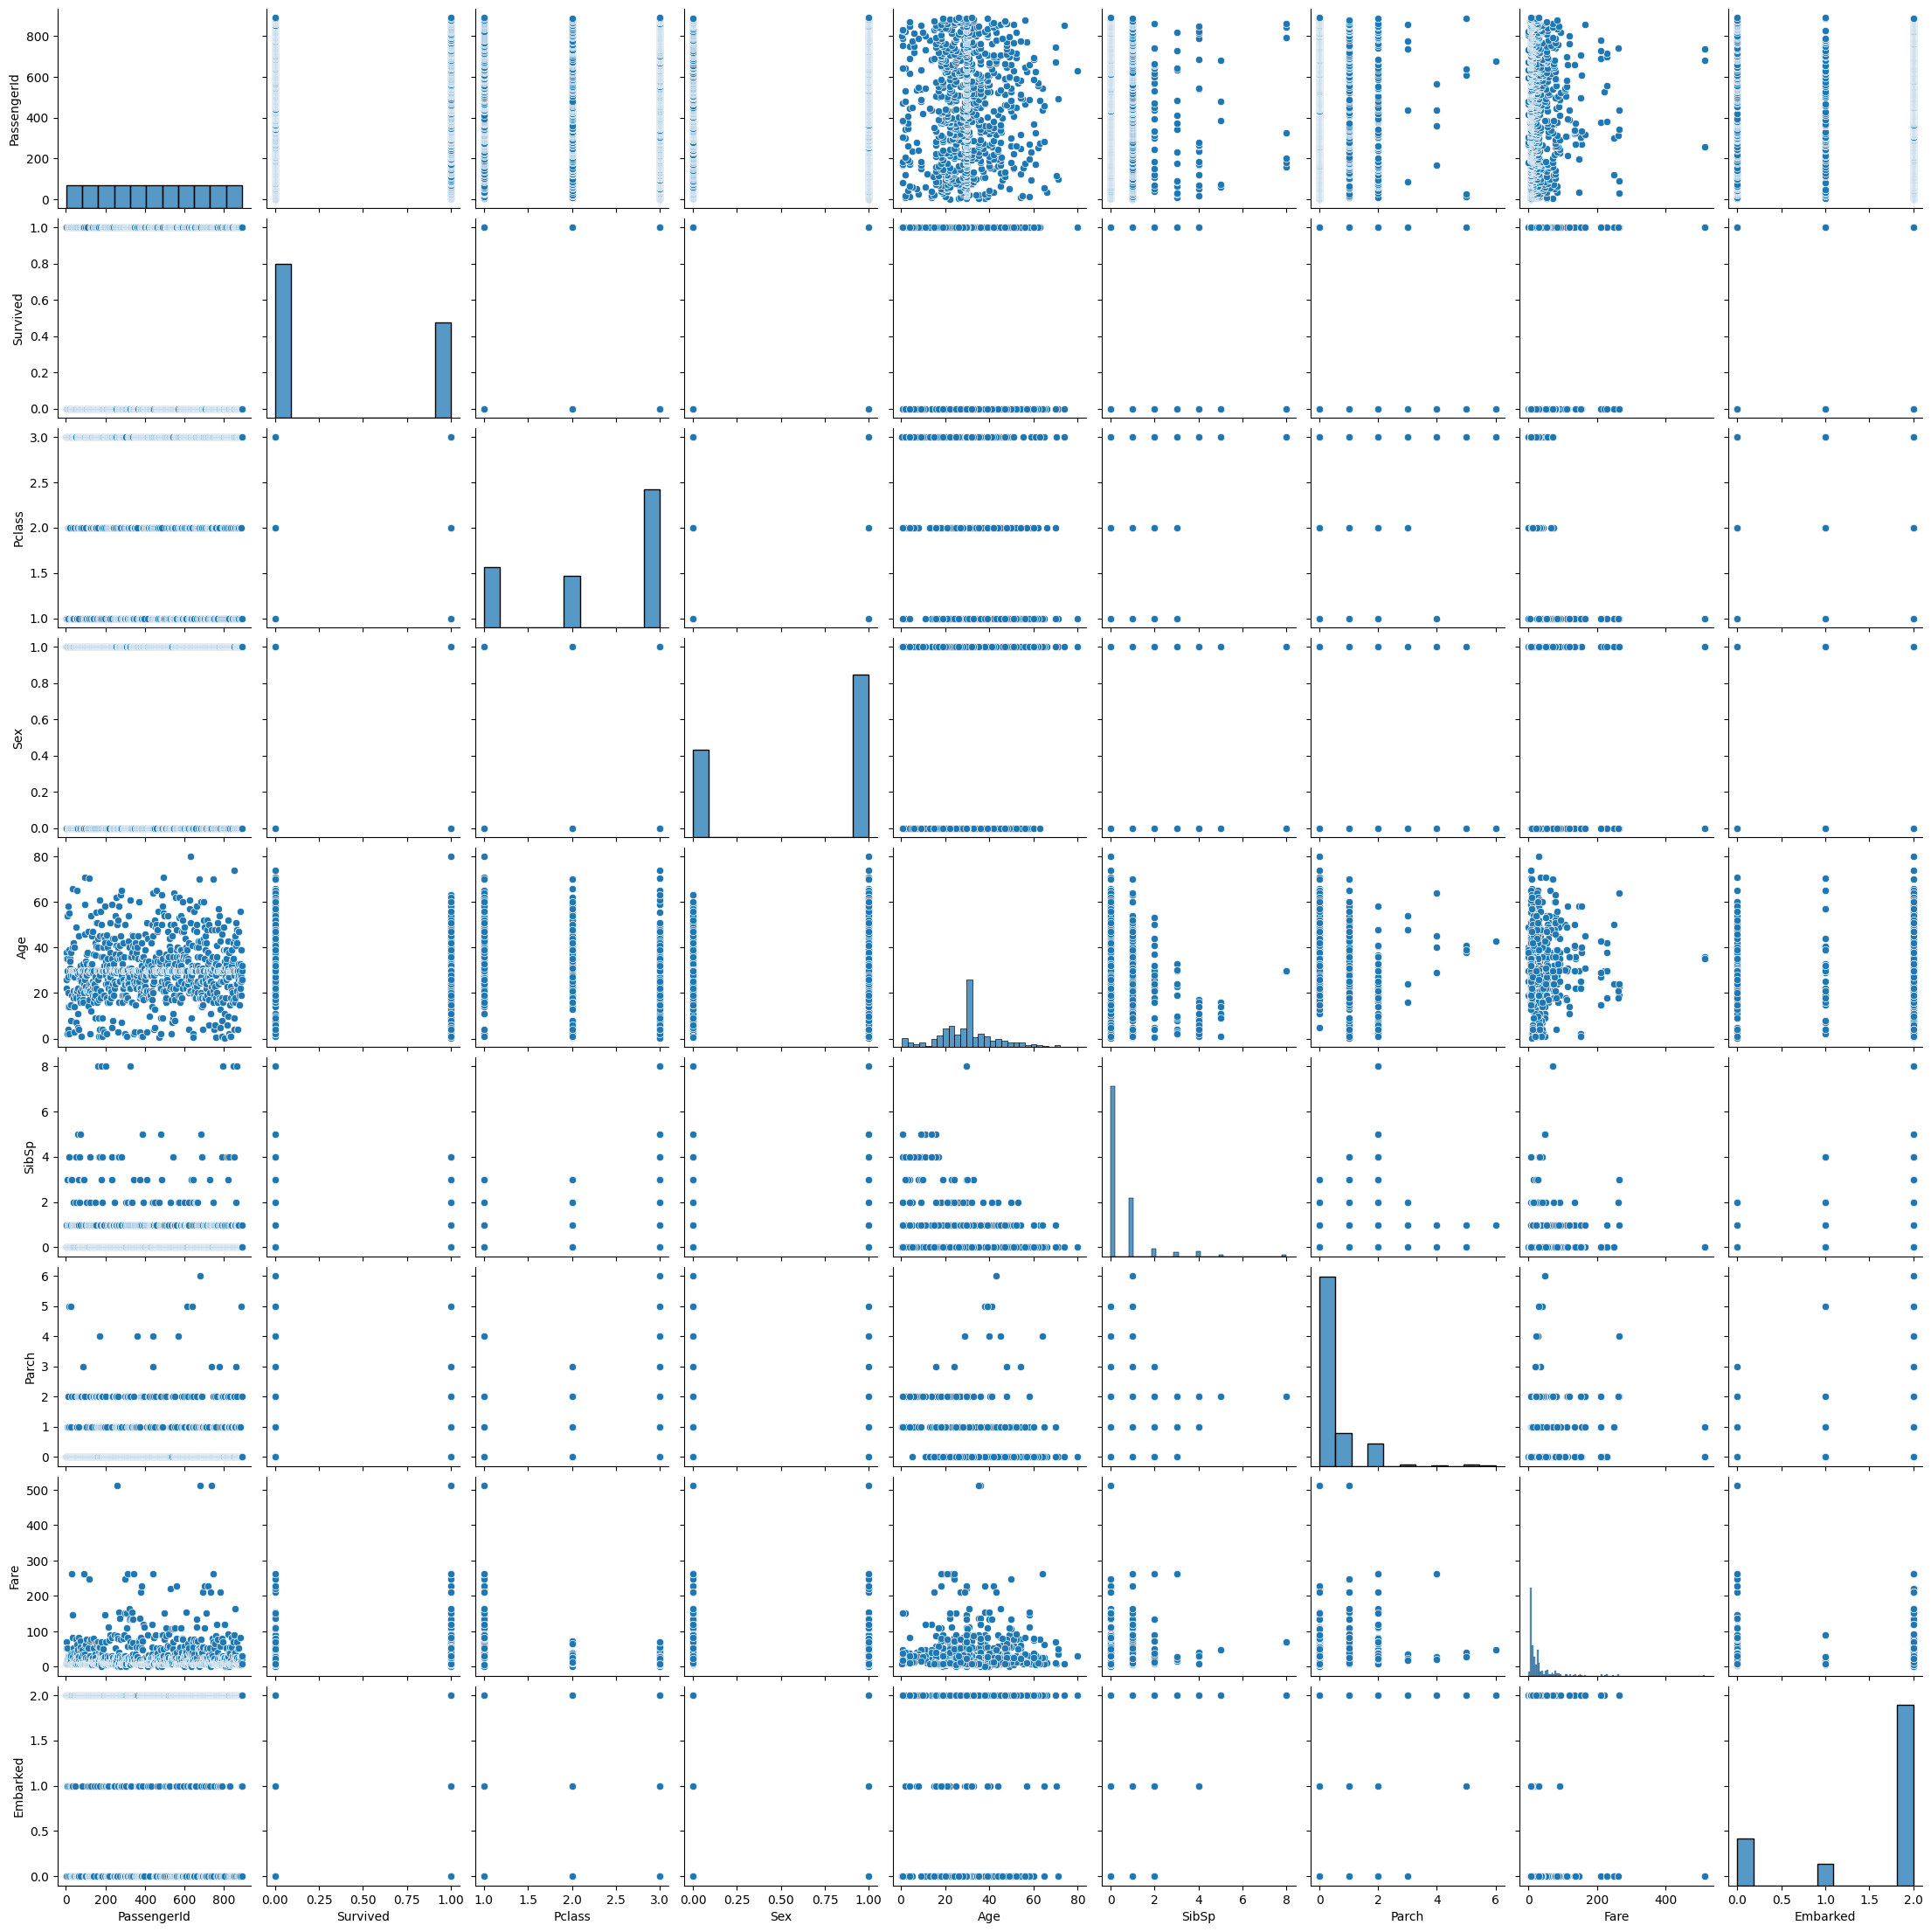

In [26]:
plt.figure(figsize = (30,30))
sns.pairplot(df)
plt.show()

In [27]:
df['Sex'].value_counts()

Sex
1    577
0    312
Name: count, dtype: int64

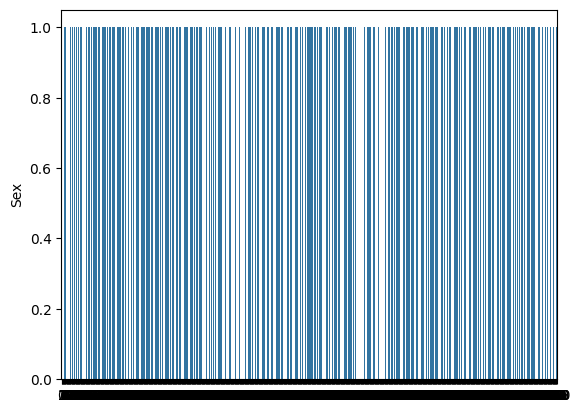

In [28]:
sns.barplot(df['Sex'])
plt.show()

Check normal distribution

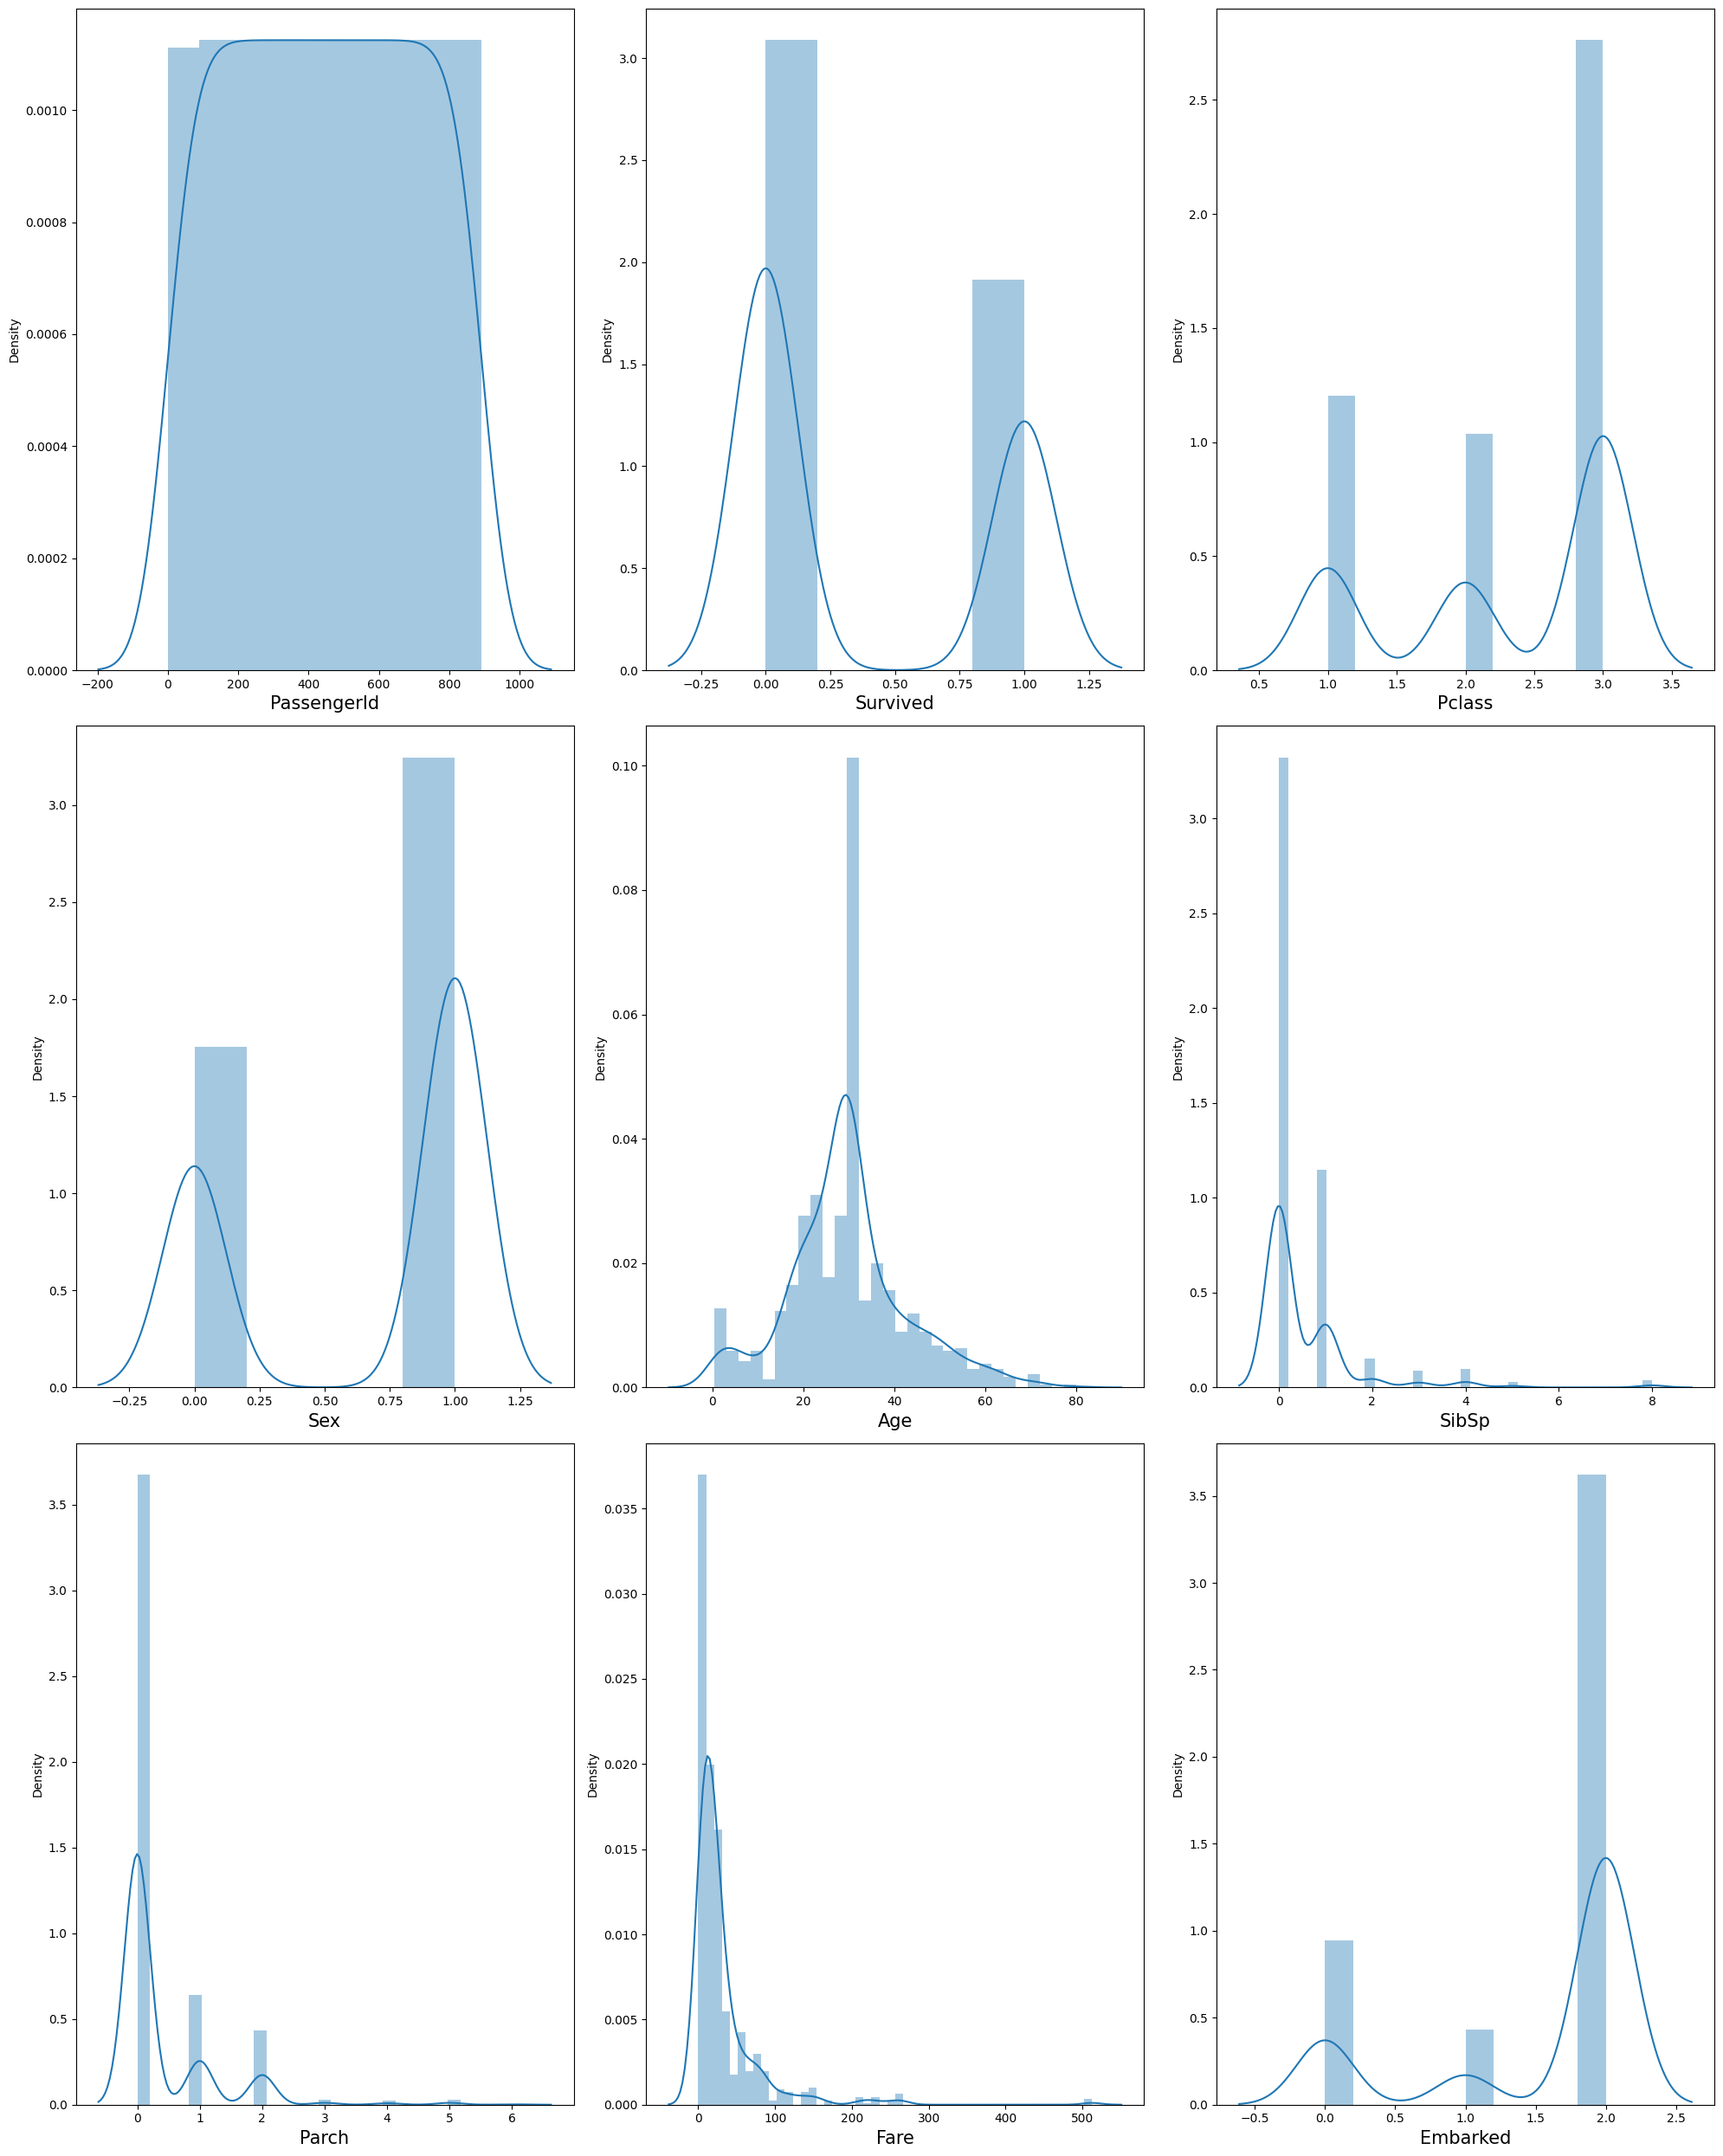

In [31]:
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df.columns:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
    plotnumber += 1
plt.tight_layout()

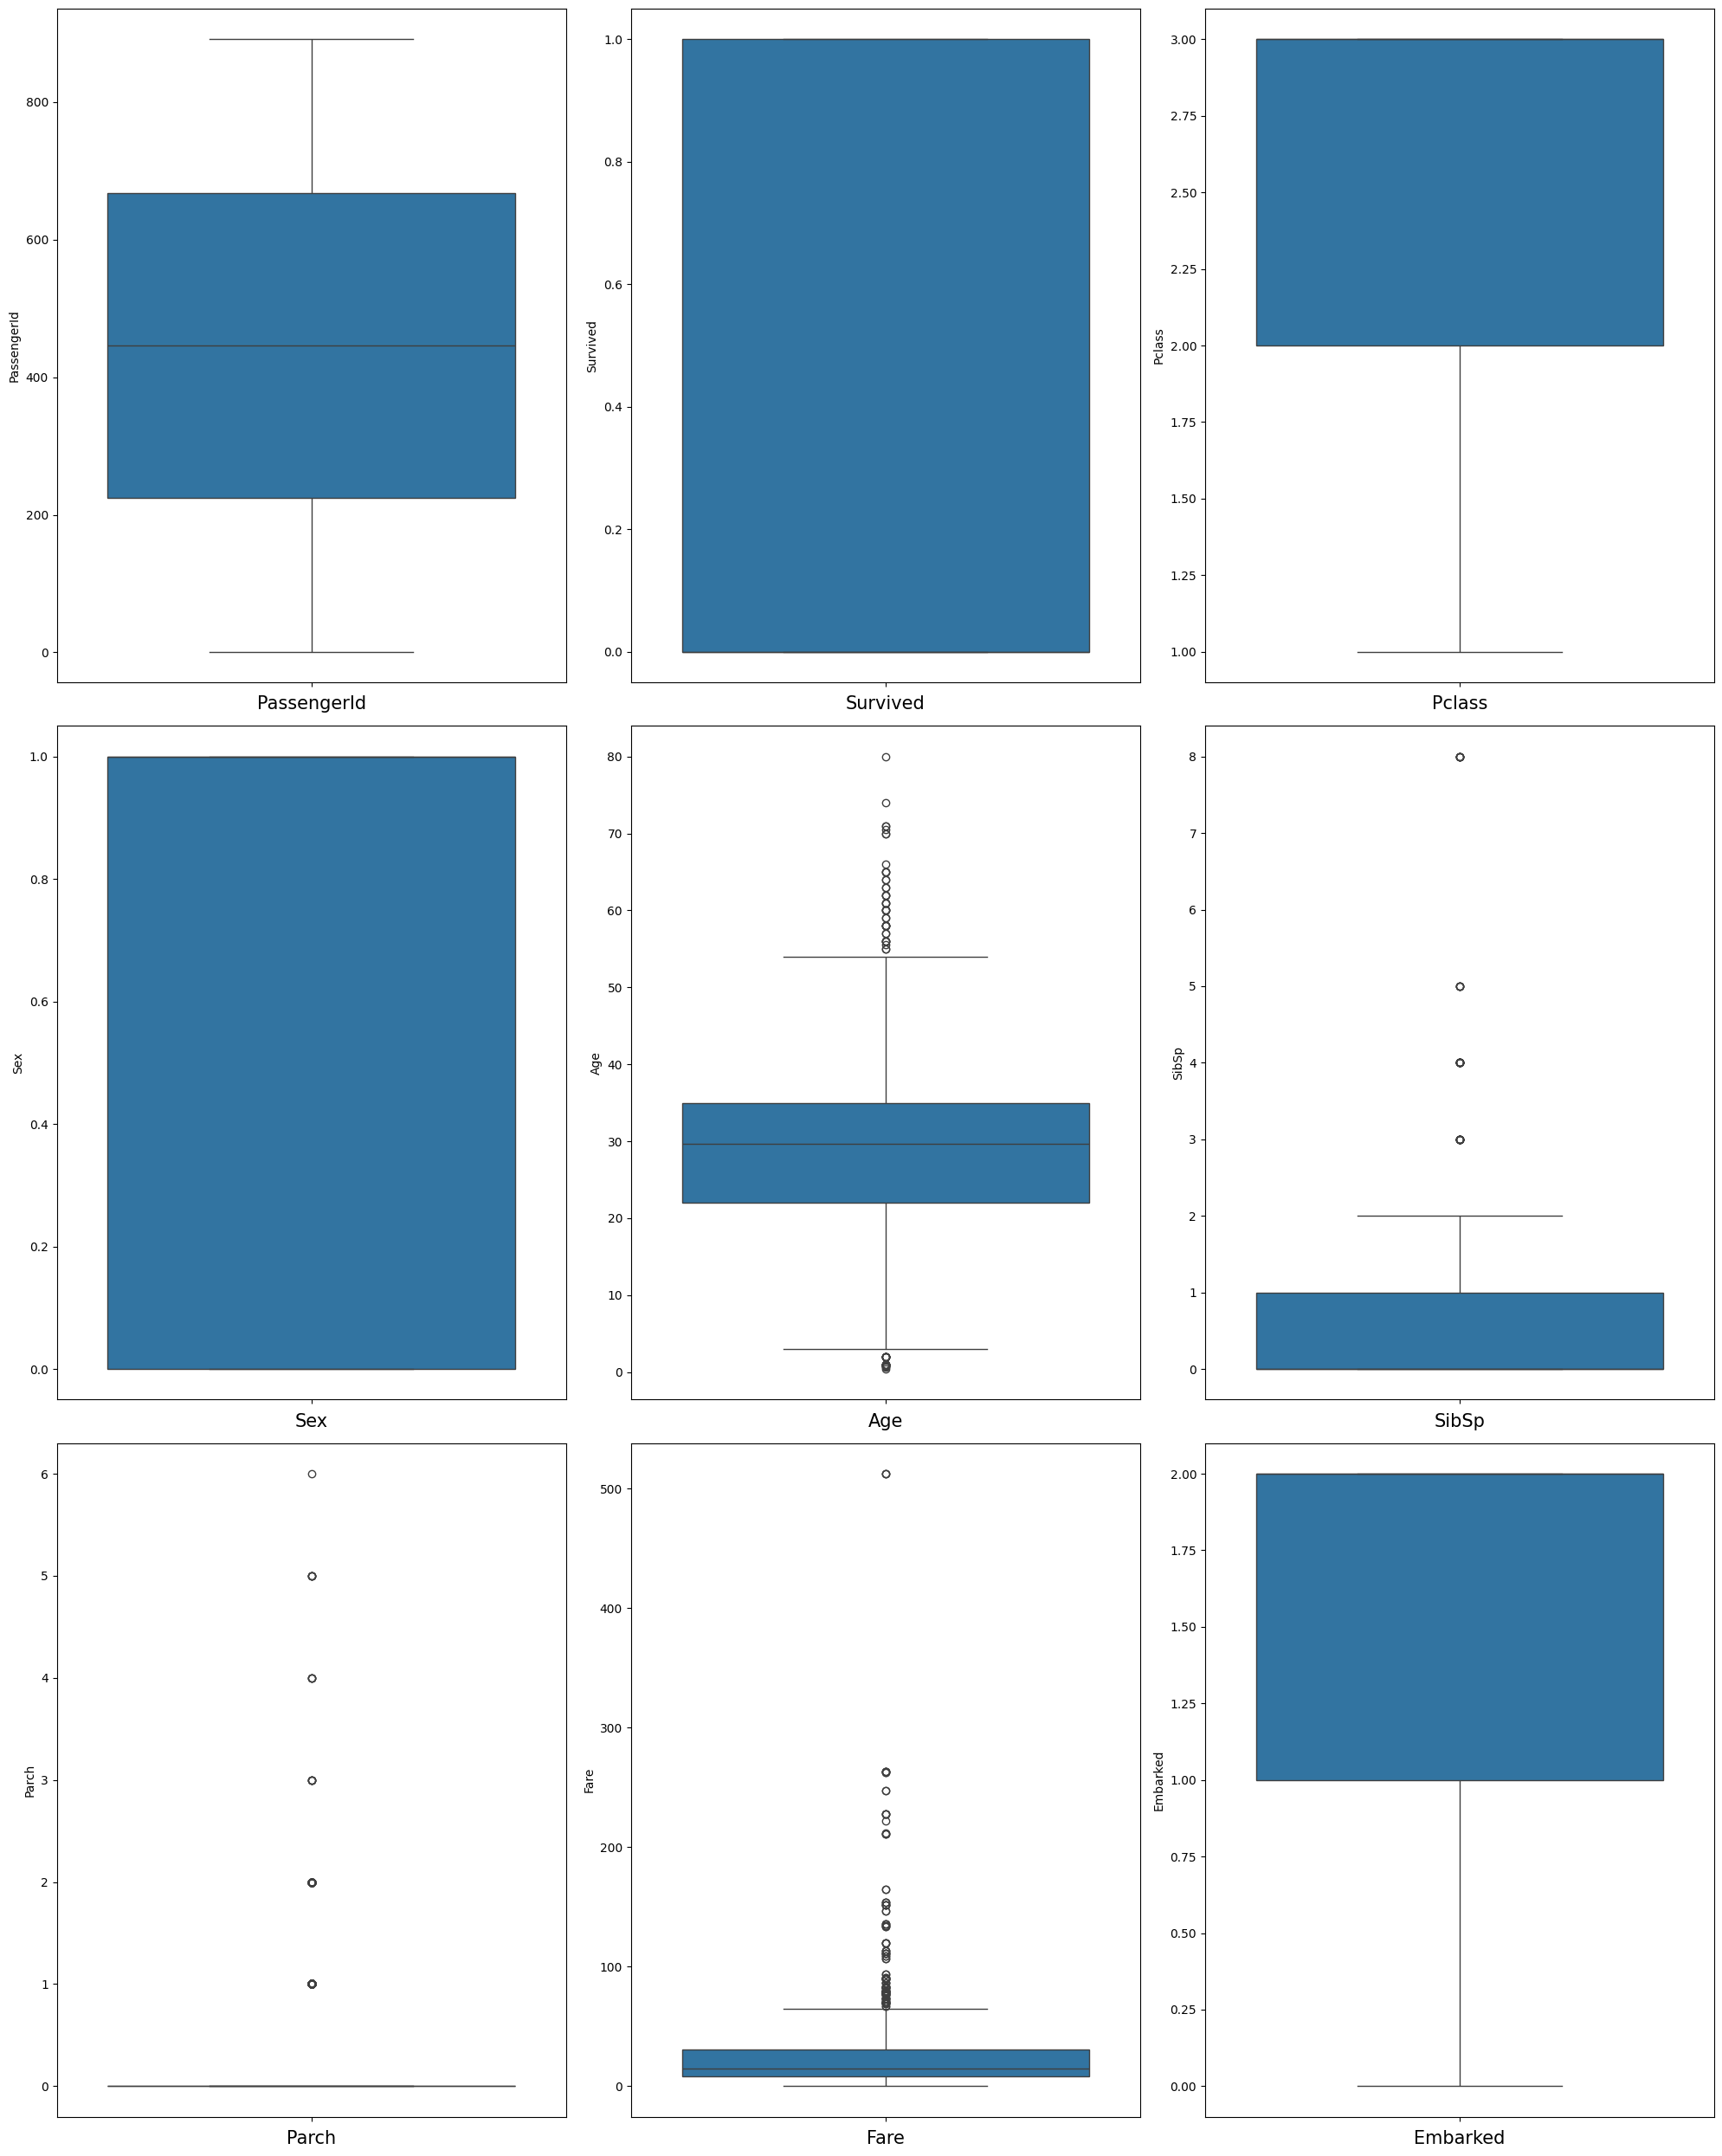

In [32]:
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df.columns:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize = 15)
    plotnumber += 1
plt.tight_layout()

Use Z-Score Statistics to treat Outliers

In [33]:
from scipy.stats import zscore

z_score = zscore(df[['Fare','Age']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(862, 9)

In [34]:
df.skew()

PassengerId    0.011655
Survived       0.508351
Pclass        -0.715372
Sex           -0.639189
Age            0.234770
SibSp          3.747283
Parch          2.836258
Fare           2.279424
Embarked      -1.324871
dtype: float64

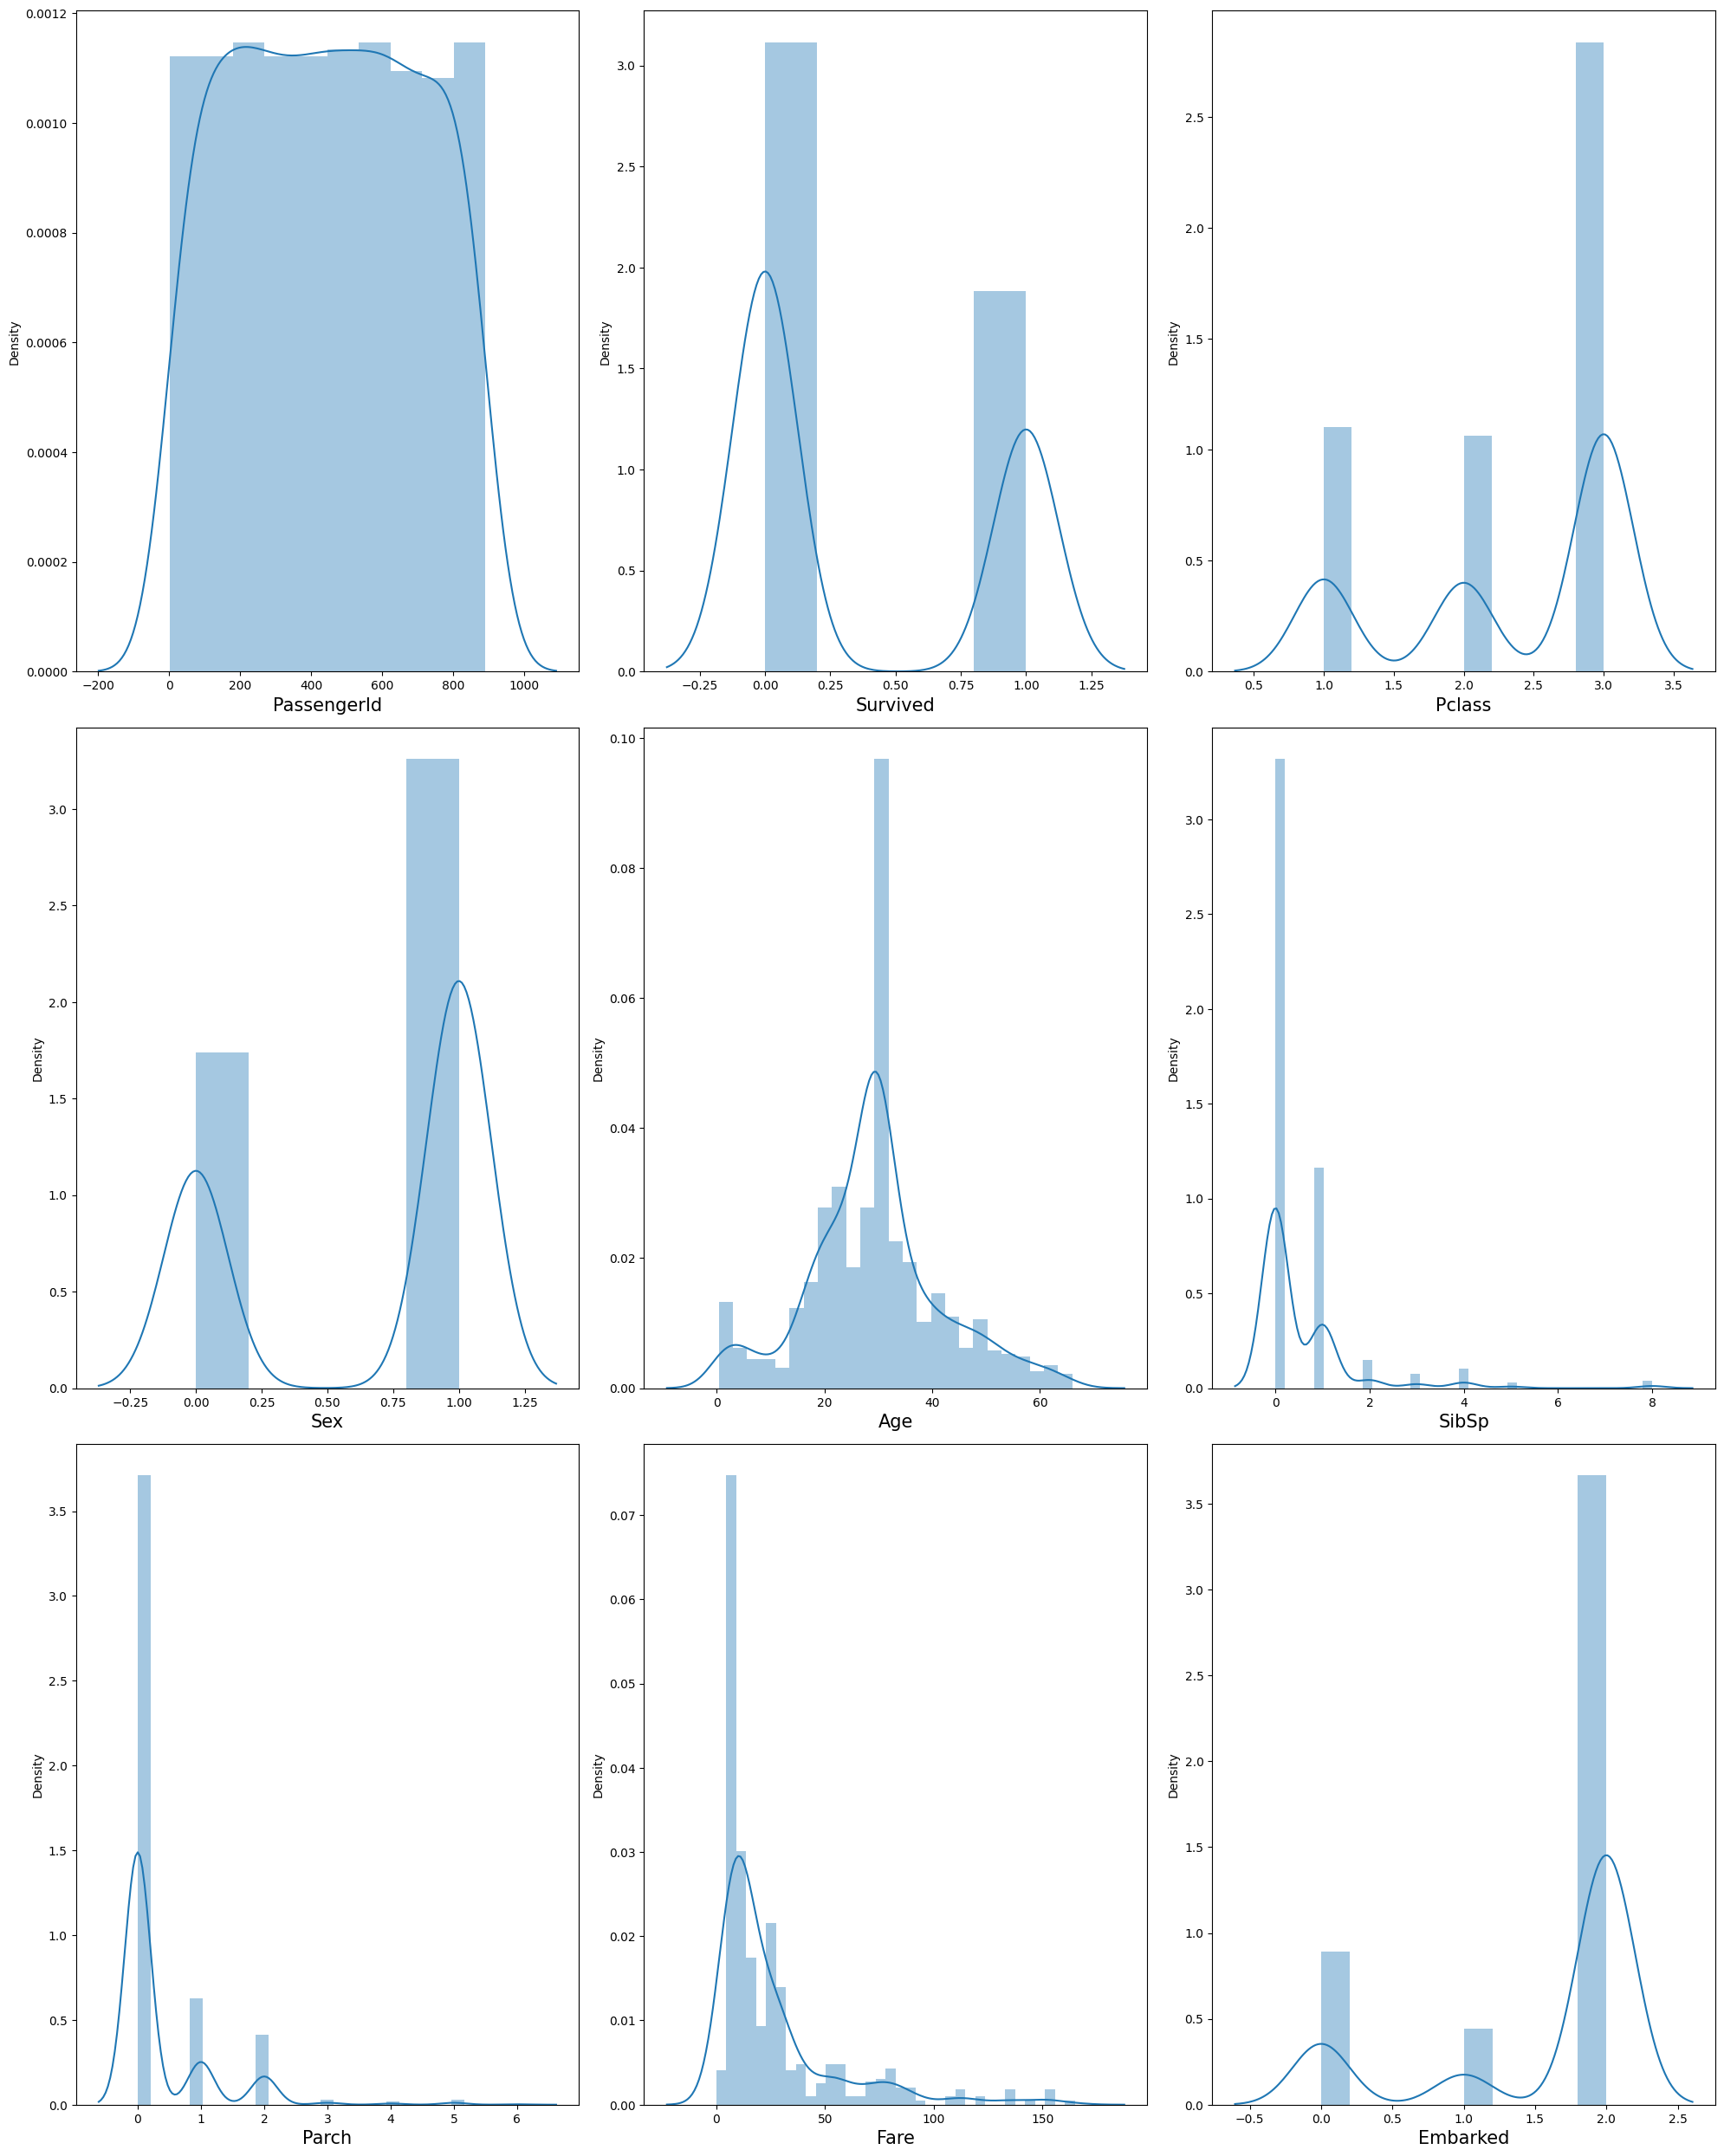

In [35]:
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df.columns:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
    plotnumber += 1
plt.tight_layout()

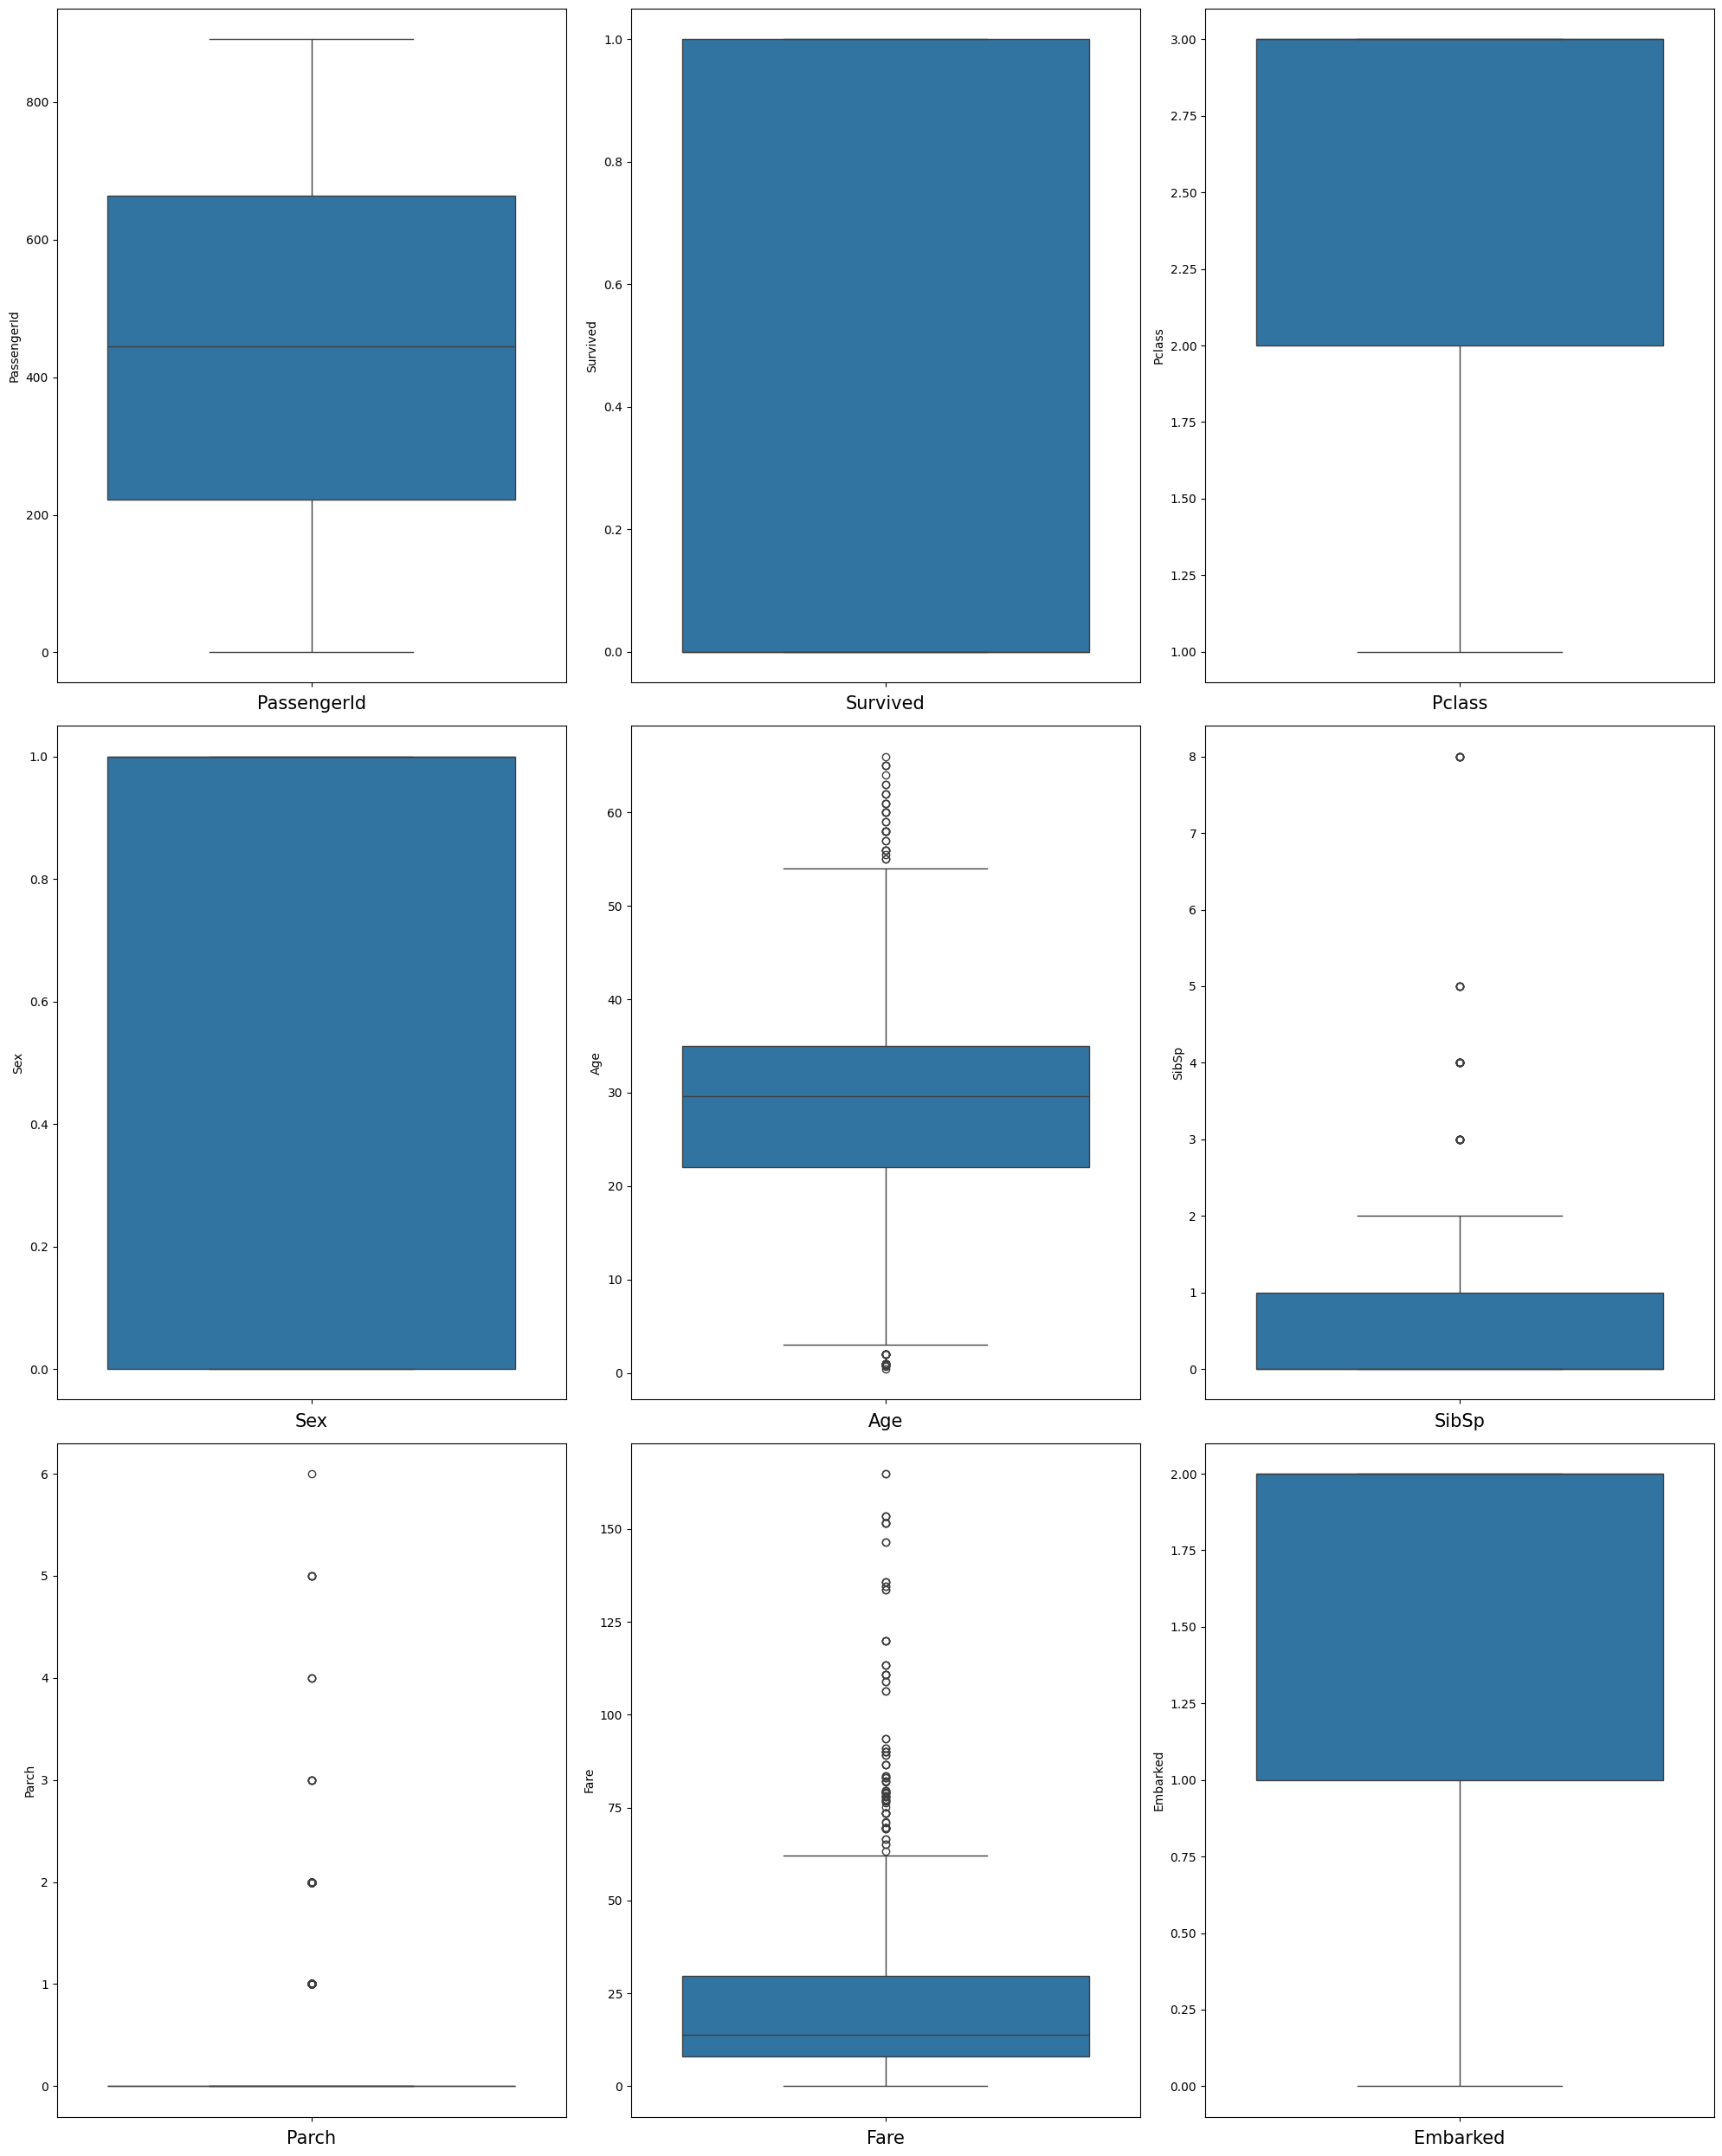

In [36]:
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df.columns:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize = 15)
    plotnumber += 1
plt.tight_layout()

In [37]:
df['Fare'] = np.cbrt(df['Fare'].values)
df['Fare']

0      1.935438
1      4.146318
2      1.993730
3      3.758647
4      2.004158
         ...   
886    2.351335
887    3.107233
888    2.862294
889    3.107233
890    1.978946
Name: Fare, Length: 862, dtype: float64

In [38]:
df.skew()

PassengerId    0.011655
Survived       0.508351
Pclass        -0.715372
Sex           -0.639189
Age            0.234770
SibSp          3.747283
Parch          2.836258
Fare           0.625048
Embarked      -1.324871
dtype: float64

In [39]:
df['Age'].min()

0.42

In [40]:
df['Age'].max()

66.0

Plot heatmap

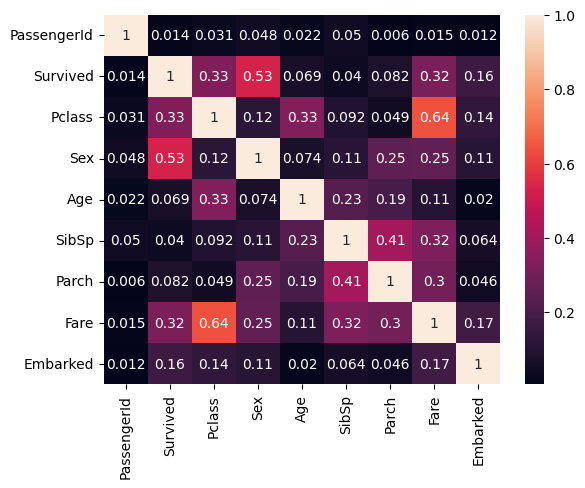

In [41]:
sns.heatmap(df.corr().abs(), annot = True)
plt.show()

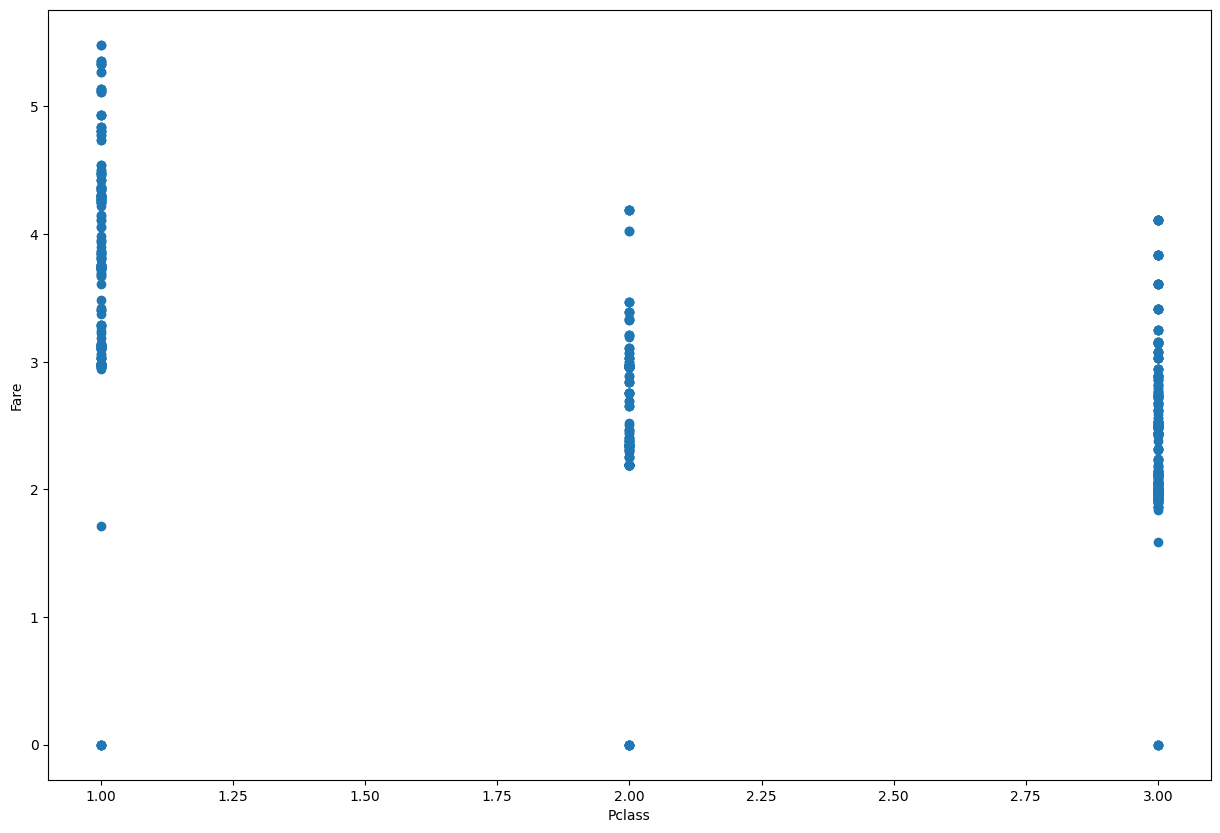

In [42]:
plt.figure(figsize = (15,10))
plt.scatter(x = 'Pclass', y = 'Fare', data = df)
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

In [43]:
X = df.drop(columns = ['Survived'],axis = 1)
y = df.Survived

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.feature_selection import SelectKBest,f_classif
best_features = SelectKBest(score_func = f_classif, k = 8)
fit = best_features.fit(X_scaled,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)


In [44]:
df_scores

,0
0,0.180303
1,105.325560
2,339.693591
3,4.064268
4,1.407297
5,5.767451
6,97.742947
7,23.732388


In [45]:
df_columns

,0
0,PassengerId
1,Pclass
2,Sex
3,Age
4,SibSp
5,Parch
6,Fare
7,Embarked


In [46]:
new_X = df.drop(columns = ['PassengerId','SibSp','Survived'])
new_X

,Pclass,Sex,Age,Parch,Fare,Embarked
0,3,1,22.000000,0,1.935438,2
1,1,0,38.000000,0,4.146318,0
2,3,0,26.000000,0,1.993730,2
3,1,0,35.000000,0,3.758647,2
4,3,1,35.000000,0,2.004158,2
...,...,...,...,...,...,...
886,2,1,27.000000,0,2.351335,2
887,1,0,19.000000,0,3.107233,2
888,3,0,29.642093,2,2.862294,2
889,1,1,26.000000,0,3.107233,0


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
X_scaled = scaler.fit_transform(new_X)
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = new_X.columns

# Let's check the values
vif

,vif,Features
0,2.095176,Pclass
1,1.123338,Sex
2,1.178848,Age
3,1.312773,Parch
4,2.184332,Fare
5,1.050939,Embarked


All the values are less than 5 means no multicollinearity

Modelling

Find the best random state

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAcc = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30,random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Best Accuracy is ",maxAcc,"at random state ",maxRS)

Best Accuracy is  0.8532818532818532 at random state  188


Creating train test split

In [50]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30,random_state = 140)

In [51]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.model_selection import cross_val_score

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
from sklearn.metrics import auc

In [54]:
# Train models
rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
knc = KNeighborsClassifier()

models = {
    'Random Forest':rfc,
    'Extra Trees':etc,
    'Decision Tree': dtc,
    'SVM': svc,
    'Gradient Boosting':gbc,
    'Ada boost': abc,
    'KNN':knc
}

In [55]:
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)
print(accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

0.7837837837837838
[[138  18]
 [ 38  65]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       156
           1       0.78      0.63      0.70       103

    accuracy                           0.78       259
   macro avg       0.78      0.76      0.77       259
weighted avg       0.78      0.78      0.78       259



In [56]:
etc.fit(x_train,y_train)
pred_etc = etc.predict(x_test)
print(accuracy_score(y_test,pred_etc))
print(confusion_matrix(y_test,pred_etc))
print(classification_report(y_test,pred_etc))

0.7799227799227799
[[136  20]
 [ 37  66]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       156
           1       0.77      0.64      0.70       103

    accuracy                           0.78       259
   macro avg       0.78      0.76      0.76       259
weighted avg       0.78      0.78      0.78       259



In [57]:
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

0.7606177606177607
[[133  23]
 [ 39  64]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       156
           1       0.74      0.62      0.67       103

    accuracy                           0.76       259
   macro avg       0.75      0.74      0.74       259
weighted avg       0.76      0.76      0.76       259



In [58]:
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.7992277992277992
[[146  10]
 [ 42  61]]
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       156
           1       0.86      0.59      0.70       103

    accuracy                           0.80       259
   macro avg       0.82      0.76      0.77       259
weighted avg       0.81      0.80      0.79       259



In [59]:
gbc.fit(x_train,y_train)
pred_gbc = gbc.predict(x_test)
print(accuracy_score(y_test,pred_gbc))
print(confusion_matrix(y_test,pred_gbc))
print(classification_report(y_test,pred_gbc))

0.7799227799227799
[[137  19]
 [ 38  65]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       156
           1       0.77      0.63      0.70       103

    accuracy                           0.78       259
   macro avg       0.78      0.75      0.76       259
weighted avg       0.78      0.78      0.78       259



In [60]:
abc.fit(x_train,y_train)
pred_abc = abc.predict(x_test)
print(accuracy_score(y_test,pred_abc))
print(confusion_matrix(y_test,pred_abc))
print(classification_report(y_test,pred_abc))

0.8108108108108109
[[139  17]
 [ 32  71]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       156
           1       0.81      0.69      0.74       103

    accuracy                           0.81       259
   macro avg       0.81      0.79      0.80       259
weighted avg       0.81      0.81      0.81       259



In [61]:
knc.fit(x_train,y_train)
pred_knc = knc.predict(x_test)
print(accuracy_score(y_test,pred_knc))
print(confusion_matrix(y_test,pred_knc))
print(classification_report(y_test,pred_knc))

0.7876447876447876
[[138  18]
 [ 37  66]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       156
           1       0.79      0.64      0.71       103

    accuracy                           0.79       259
   macro avg       0.79      0.76      0.77       259
weighted avg       0.79      0.79      0.78       259



In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_lr = knc.predict(x_test)
print(accuracy_score(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

0.7876447876447876
[[138  18]
 [ 37  66]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       156
           1       0.79      0.64      0.71       103

    accuracy                           0.79       259
   macro avg       0.79      0.76      0.77       259
weighted avg       0.79      0.79      0.78       259



Cross Validation Score

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
score1 = cross_val_score(rfc,X_scaled,y)
print(score1)
print(score1.mean())
print("Difference between accuracy score and cross val score is :" , accuracy_score(y_test,pred_rfc) - score1.mean())

[0.76300578 0.8150289  0.8255814  0.79069767 0.83139535]
0.8051418201371152
Difference between accuracy score and cross val score is : -0.021358036353331444


In [66]:
score2 = cross_val_score(etc,X_scaled,y)
print(score2)
print(score2.mean())
print("Difference between accuracy score and cross val score is :" , accuracy_score(y_test,pred_etc) - score2.mean())

[0.73988439 0.78612717 0.85465116 0.77906977 0.81395349]
0.7947371958596585
Difference between accuracy score and cross val score is : -0.0148144159368786


In [67]:
score3 = cross_val_score(dtc,X_scaled,y)
print(score3)
print(score3.mean())
print("Difference between accuracy score and cross val score is :" , accuracy_score(y_test,pred_dtc) - score3.mean())

[0.72254335 0.78034682 0.81976744 0.79069767 0.80232558]
0.7831361742169647
Difference between accuracy score and cross val score is : -0.022518413599204035


In [68]:
score4 = cross_val_score(svc,X_scaled,y)
print(score4)
print(score4.mean())
print("Difference between accuracy score and cross val score is :" , accuracy_score(y_test,pred_svc) - score4.mean())

[0.80924855 0.8265896  0.79651163 0.80232558 0.84302326]
0.8155397230810593
Difference between accuracy score and cross val score is : -0.01631192385326008


In [69]:
score5 = cross_val_score(gbc,X_scaled,y)
print(score5)
print(score5.mean())
print("Difference between accuracy score and cross val score is :" , accuracy_score(y_test,pred_gbc) - score5.mean())

[0.78034682 0.8150289  0.84883721 0.80232558 0.8255814 ]
0.8144239817179729
Difference between accuracy score and cross val score is : -0.034501201795193004


In [70]:
score6 = cross_val_score(abc,X_scaled,y)
print(score6)
print(score6.mean())
print("Difference between accuracy score and cross val score is :" , accuracy_score(y_test,pred_abc) - score6.mean())

[0.80346821 0.8150289  0.80813953 0.81395349 0.79651163]
0.8074203521978761
Difference between accuracy score and cross val score is : 0.0033904586129347436


In [71]:
score7 = cross_val_score(knc,X_scaled,y)
print(score7)
print(score7.mean())
print("Difference between accuracy score and cross val score is :" , accuracy_score(y_test,pred_knc) - score7.mean())

[0.78034682 0.79190751 0.80813953 0.8255814  0.79069767]
0.7993345879822558
Difference between accuracy score and cross val score is : -0.011689800337468137


In [72]:
score8 = cross_val_score(lr,X_scaled,y)
print(score8)
print(score8.mean())
print("Difference between accuracy score and cross val score is :" , accuracy_score(y_test,pred_lr) - score8.mean())

[0.77456647 0.79190751 0.76744186 0.79651163 0.80232558]
0.7865506116413497
Difference between accuracy score and cross val score is : 0.0010941760034379744


Difference between accuracy score and cross val score for GBC is : -0.034501201795193004 which is least

GBC is our best fitted model

HyperParameterTuning

In [74]:
help(gbc)

Help on GradientBoostingClassifier in module sklearn.ensemble._gb object:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  This algorithm builds an additive model in a forward stage-wise fashion; it
 |  allows for the optimization of arbitrary differentiable loss functions. In
 |  each stage ``n_classes_`` regression trees are fit on the negative gradient
 |  of the loss function, e.g. binary or multiclass log loss. Binary
 |  classification is a special case where only a single regressio

In [75]:
param_grid = {
    'criterion' : ['friedman_mse', 'squared_error'],
    'learning_rate': range(0,1),
    'loss' : ['log_loss', 'exponential'],
    'min_samples_split':range(2,16),
    'min_samples_leaf':range(1,15),
    'max_depth': range(10,15) 
    
}

In [76]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = param_grid)
grid_search.fit(x_train,y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
final_model = grid_search.best_estimator_
pred = final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc * 100)

In [ ]:
import joblib
joblib.dump(final_model,'Titanic Survived Project.pkl')

In [ ]:
# Let's load the saved model and get the predictions
model = joblib.load('itanic Survived Project.pkl')

# Prediction
prediction = model.predict(x_test)
prediction